Gere uma variável aleatória X com distribuição uniforme com 1000 amostras e intervalo [a,b] de sua escolha.

In [18]:
from scipy.stats import norm, uniform
import numpy as np
import seaborn as sns
import statsmodels.stats.api as sms
import matplotlib.pyplot as plt
sns.set_theme()

In [2]:
# variavel aleatoria
a = 0.0
b = 3.0
X = np.random.uniform(a,b, size=1000)

1. Selecione aleatoriamente $20$ amostras de $X$ e construa o intervalo de confiança para a média com 𝛼 = $5$%. Considere a variância conhecida, obtida da população de $1000$ amostras. Repita este procedimento e construa $50$ intervalos para a média. Plote os intervalos das médias junto com a média de $X$ e comente os resultados que obteve, comparando os intervalos estimados e verificando se eles contêm a média conhecida da população.

In [5]:
varX = X.var()
varX

0.7537165924209078

In [27]:
# seleciono 20 valores aleatoriamente
sampleX = np.random.choice(X, size=20)
muX = sampleX.mean()

In [61]:
x = sorted(sampleX)

In [67]:
ci = uniform.interval(0.95, loc=muX, scale=X.std())

Text(0.5, 0, 'x')

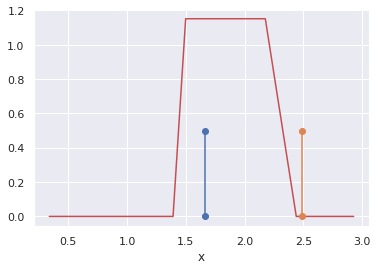

In [79]:
mu = muX
sigma = X.std()
fig, ax = plt.subplots()

#count, bins, _ = ax.hist(sampleX, density=True)
ax.plot(x, uniform.pdf(x, loc=muX, scale=X.std()), 'r')
# cnfidence interval left line
one_x12, one_y12 = [ci[0], ci[0]], [0, .5]
# cnfidence interval right line
two_x12, two_y12 = [ci[1], ci[1]], [0, .5]
ax.plot(one_x12, one_y12, two_x12, two_y12, marker = 'o')
ax.set_xlabel("x")

In [94]:
n = 50
n_intervalos = []
for i in range(n):
    xsample = np.random.choice(X, size=20, replace=False)
    ci = uniform.interval(0.95, loc=xsample.mean(), scale=X.std())
    n_intervalos.append(ci)

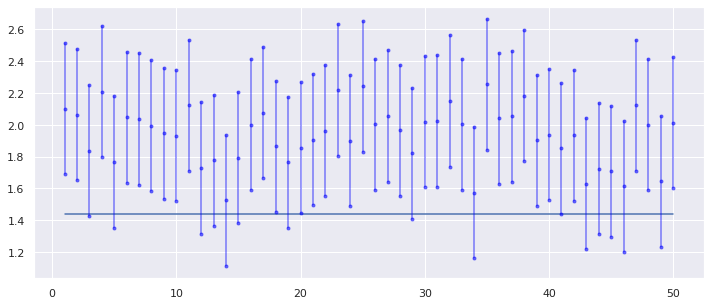

In [98]:
fig, ax = plt.subplots(figsize=(12,5))
y = [muX for _ in range(50)]
intervalos = np.arange(1,51)
ax.plot(intervalos, y)
for i in intervalos:
    ypoints = [n_intervalos[i-1][0], np.mean(n_intervalos[i-1]), n_intervalos[i-1][1]]
    ax.plot([i,i,i], ypoints, marker='.', c='blue', alpha=0.5)


Exemplo com desvio padrão desconhecido

https://stackoverflow.com/questions/15033511/compute-a-confidence-interval-from-sample-data

In [87]:
ypoints

[1.2407495480481086, 1.6531295986870398, 1.2407495480481086]

<AxesSubplot:ylabel='Density'>

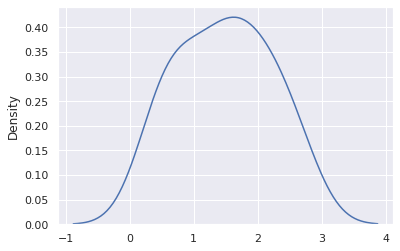

In [14]:
fig, ax = plt.subplots()
sns.kdeplot(sampleX, ax=ax)

2. Plote o histograma cumulativo das 50 médias calculadas e compare com a cdf teórica da média amostral de X.

3. Repita a atividade 1 considerando a variância desconhecida e compare os intervalos

4. Repita a atividade 1 fazendo um intervalo de confiança para a variância da variável X gerada com distribuição normal, média 𝜇 e variância 𝜎 escolhidas. Faça o histograma das 50 variâncias e analise.

5. Um fabricante de equipamentos seleciona aleatoriamente 1200 unidades e verifica que 8 têm defeito

- 5.1 Construa um intervalo de confiança de 95% para a proporção de unidades com defeito

- 5.2 Há evidências para suportar a afirmação de que a fração de peças com defeito é menor que 1%?